<a href="https://colab.research.google.com/github/MinhQuan0000/AI_Final/blob/main/Final_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


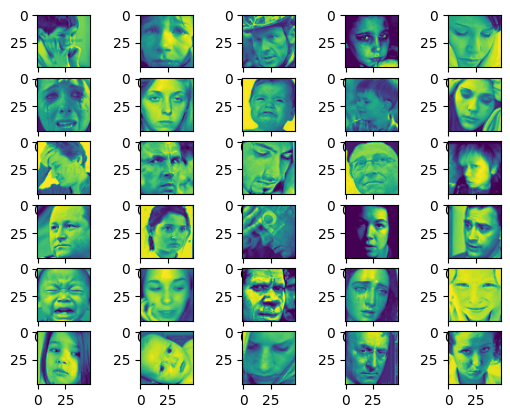

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/train/'

for i in range(30):
  plt.subplot(6,5,i+1)
  filename = folder + 'sad ('+ str(i+1)+').png'
  img1 = plt.imread(filename)
  plt.imshow(img1)
plt.show()

In [ ]:
from os import listdir 
from os.path import isdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array

folder = '/content/drive/MyDrive/train/'
photos,labels = list(),list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('angry '):
    output = 1 
  if file.startswith('disgusted '):
    output = 2
  if file.startswith('fearful '):
    output = 3
  if file.startswith('happy '):
    output = 4
  if file.startswith('neutral '):
    output = 5
  if file.startswith('sad '):
    output = 6
  if file.startswith('suprised '):
    output = 7

  img = load_img(folder + file,target_size=(30,40))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/nhandien_photos_R.npy',photos)
save('/content/drive/MyDrive/Colab Notebooks/nhandien_labels_R.npy',labels)

(28543, 30, 40, 3) (28543,)


In [ ]:
import numpy as np
x_train = np.load('/content/drive/MyDrive/Colab Notebooks/nhandien_photos_R.npy')
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/nhandien_labels_R.npy')
print(x_train.shape)
print(y_train.shape)

(28543, 30, 40, 3)
(28543,)


In [ ]:
x_train = x_train.astype('float32')/255


In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam

y_train = to_categorical(y_train,10)
model = Sequential()

# tich chap 32 lan
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(30,40,3),padding='same'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

# tich chap 64 lan
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

# tich chap 128 lan
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))


from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train, batch_size=64,epochs=100,verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 15, 20, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 10, 64)        0         
 g2D)                                                 

In [ ]:
model.save('nhandancamxucR.h5')

In [ ]:
ten = {1:"angry",2:"disgusted",3:"fearful",4:"happy",5:"neutral",6:"sad",7:"suprised"}

1/1 [==============================] - 0s 133ms/step


'neutral'

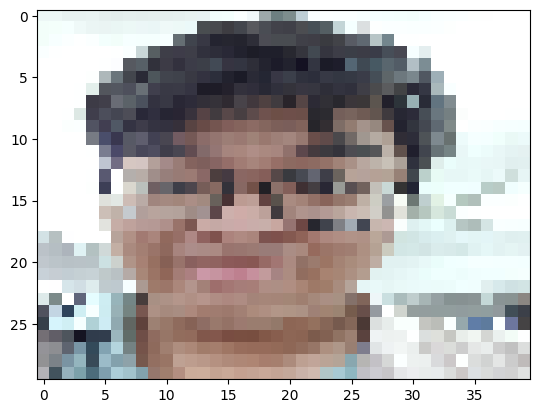

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

img = load_img("/content/drive/MyDrive/pic_test/quan (48).jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
ten[result[0]]

1/1 [==============================] - 0s 24ms/step


'sad'

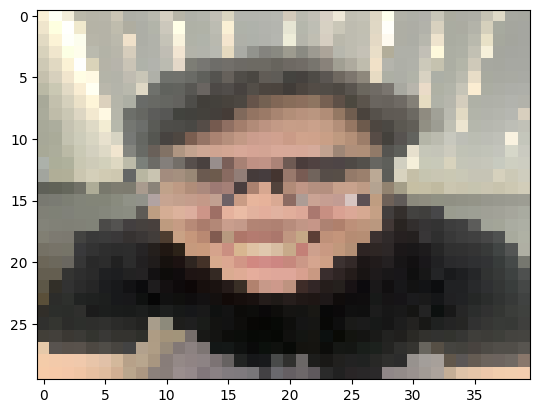

In [ ]:
img = load_img("/content/drive/MyDrive/pic_test/thang (3).jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
ten[result[0]]

1/1 [==============================] - 0s 21ms/step


'happy'

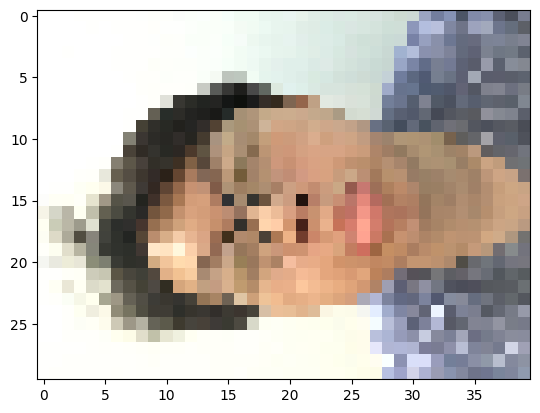

In [ ]:
img = load_img("/content/drive/MyDrive/Ảnh AI/Long (20).JPG",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
ten[result[0]]

1/1 [==============================] - 0s 77ms/step


'angry'

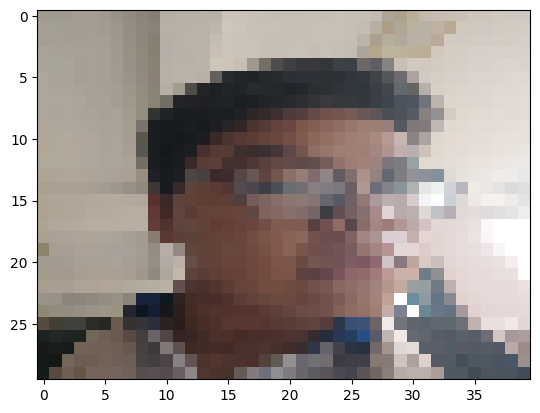

In [ ]:
img = load_img("/content/drive/MyDrive/pic/quan (35).jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
ten[result[0]]

In [ ]:
img = load_img("/content/drive/MyDrive/Ảnh AI/Long (20).JPG",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
ten[result[0]]